In [1]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(readr)
library(stringr)
library(ggbeeswarm)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
df = read.csv('data.csv') %>% spread(type, time)

In [3]:
df = df %>% mutate(EAE = AE) %>% 
    mutate (ESS = SS) %>%
    mutate(Benchmark = benchmark) %>%
    select(Benchmark, ORG, ESS, EAE, PLP)

In [4]:
df = df %>% mutate(Speedup_ORG = ORG/ORG) %>% 
    mutate(Speedup_PLP = ORG/PLP) %>% 
    mutate(Speedup_EAE = ORG/EAE) %>% 
    mutate(Speedup_ESS = ORG/ESS)

In [25]:
df = df %>% filter(Benchmark != 'syrk')

In [26]:
df2 = df %>% gather("Type", "Time", 2:5) %>% select(Benchmark, Type, Time)

In [31]:
options(repr.plot.width=7, repr.plot.height=5)

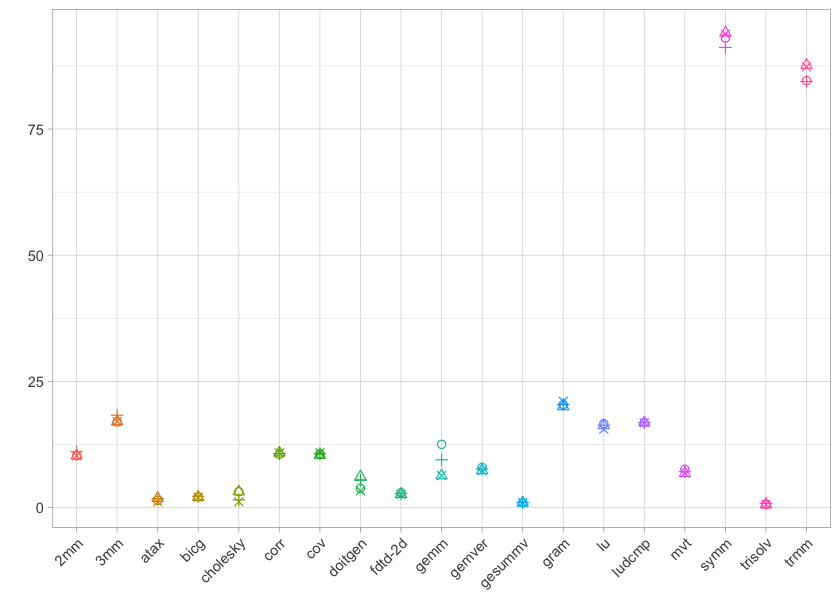

In [32]:
ggplot(data = df2, aes(x = Benchmark, y = Time, group = Type, shape = Type)) +
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1),axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
    theme(legend.position = "none") +
#     theme(axis.title.x=element_blank(), axis.text.x=element_blank()) +
#     theme(axis.title.x=element_blank(), axis.text.y=element_blank()) +
    scale_shape_manual(values = c(1, 3, 4, 2)) +
    geom_point(aes(colour = Benchmark), stat = "identity", size = 2) +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1)) +
    guides(colour = FALSE) +
#     ylab('Runtime (secs)') +
    ylab('') +
    scale_x_discrete(labels = c('2mm', '3mm', 'atax', 'bicg', 'cholesky', 'corr',
                                'cov', 'doitgen', 'fdtd-2d', 'gemm', 'gemver',
                                'gesummv', 'gram', 'lu', 'ludcmp', 'mvt', 'symm',
                                'trisolv', 'trmm')) +
    ggsave("time.pdf", device = "pdf", width = 4, height = 3)

In [33]:
df2 = df %>% select(Benchmark, Speedup_ORG, Speedup_PLP, Speedup_EAE, Speedup_ESS) %>%
    gather("Type", "Speedup", 2:5) %>%
    select(Benchmark, Type, Speedup)

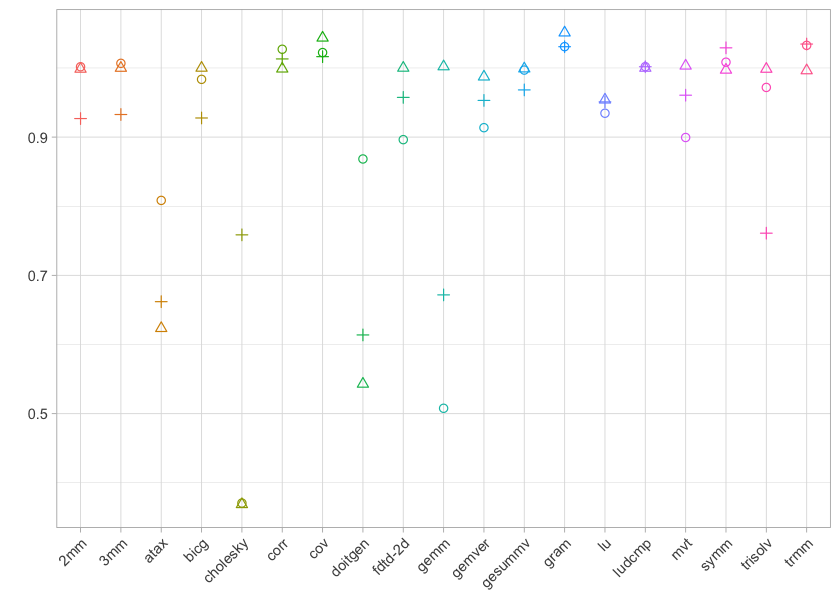

In [36]:
ggplot(data = df2 %>% filter(Type != "Speedup_ORG"), aes(x = Benchmark, y = Speedup, group = Type, shape = Type)) + 
    theme_light() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank()) +
    scale_shape_manual(values = c(1, 3, 2)) +
    geom_point(aes(colour = Benchmark), stat = "identity", size = 2) +
    theme(legend.position = "none") +
    guides(colour = F) +
#     ylab('Speedup') +
    ylab('') +
    theme(axis.text.x = element_text(angle = 45, vjust=1, hjust=1)) +
    scale_x_discrete(labels = c('2mm', '3mm', 'atax', 'bicg', 'cholesky', 'corr',
                                'cov', 'doitgen', 'fdtd-2d', 'gemm', 'gemver',
                                'gesummv', 'gram', 'lu', 'ludcmp', 'mvt', 'symm',
                                'trisolv', 'trmm')) +
    ggsave('speedup.pdf', device = 'pdf', width = 4, height = 3)